# Spotify Data Exploration

In [ ]:
<!-- vscode-markdown-toc -->

<!-- vscode-markdown-toc-config
	numbering=true
	autoSave=true
	/vscode-markdown-toc-config -->
<!-- /vscode-markdown-toc -->

### Loading Libraries

In [60]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from collections import Counter

In [61]:
warnings.filterwarnings('ignore')

In [62]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

In this notebook we will be exploring the Spotify data set to get more insight on the data set and try to create a methodology that would best allow us to predict the popularity of a track. We will be checking for missing values, checking if there are any duplicates, examining the nature of features and propose a proper course of action for any discrepancies that we may encounter along the way. We will be making appropriate data summaries and interpreting the result as well as making any visualisation that may enable us to extract insight and relationship of the data provided. Our main goal is to predict 'popularity' of a track and this is an important stage for the next analysis we will be conducting. 

## Loading Dataset and First Inspection

In [63]:
spotify = pd.read_csv("Data/dataset.csv")

In [64]:
spotify.shape

(114000, 21)

The dataset has 114,000 observation and 21 columns. Let us take a better look at how the data is structured and get started with the initial inspection before proceeding. 

In [65]:
spotify.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Just by inspecting the first observations of the data, we can see that there is a column called 'Unnamed 0:' that serves as a sort of index. Since we will not be using this columnn it is important to make note that it needs to be dropped. 

In [66]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

The data set has one boolean (logical) predictor, 9 float (continuous) predictors, 5 integer predictors (including 'Unnamed: 0', and 5 predictors that store objects. We can also see that our target 'predictor' is stored as an integer. We only have one boolean (logical) predictor and we can convert this and store it in the data set to make proper visualisatin of its occurenc.Another intersting thing we can see is that 'artist', 'album_name' and 'track_name' have one missing value each. 
We will also take note of this occurence and hande it in a subsequent section when preprocessing missing values. 

In [67]:
spotify.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,114000.0,56999.500000,32909.109681,0.000,28499.75000,56999.500000,85499.2500,113999.000
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996


The above table is the summary of all the numerical predictors and the target variable. In the first instance we can see that the predictor 'duration_ms' takes on large values with minimum value being 228029.153114 and the maximum value being 5237295.000. Again we take note of this as we will be handling this in the preprocessing stage. 

#### Missing Values and Duplicates

In [68]:
spotify.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

As we had suspected we can see that are missing values in our dataset, specifically for the 'artist', 'album_name' and 'track_name'. The best way to handle these is to drop the values. Logically, we would expect the 'track_id' to represent the unique identifier for the track and so far we have assumed that each track is unique as we have seen no duplicates when checking the entire data set. 

In [69]:
# Create a new data frame called spotify_clean
spotify_clean = spotify.dropna()

The following task will involve checking if there are any duplicates in the dataset. If we get any of the duplicates the best thing to do would be to get rid of them. 

In [70]:
spotify_clean.duplicated().sum()

0

Now the entire data set shows that there are no duplciates within the data set. But we can go one step further and use the features that uniquely identifies each track to assess if this is actually the case. 

In [71]:
spotify_clean['track_id'].nunique()

89740

Already we have some discrepancy in the dataset with the number of total rows being 114,000 and the unique 'track_id' feature containing 89741, which shows a difference of 24,259 tracks. So it is best to inspect these and see where the discrepencie lies.

In [72]:
duplicates_track_id = spotify_clean[spotify_clean.duplicated('track_id')]
duplicates_track_id.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1925,1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.2380,0.860000,0.0571,0.843,90.522,4,afrobeat
2155,2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.900,11,-3.674,1,0.0499,0.1160,0.000017,0.1190,0.599,104.655,4,alt-rock
3000,3000,5E30LdtzQTGqRvNd7l6kG5,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.521,10,-9.461,1,0.0329,0.0678,0.149000,0.1230,0.337,85.012,4,alternative
3002,3002,2K7xn816oNHJZ0aVqdQsha,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,86,206280,False,0.575,0.568,9,-5.509,0,0.0300,0.0484,0.000417,0.2860,0.370,93.986,4,alternative
3003,3003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,-2.810,1,0.0336,0.0495,0.017700,0.1010,0.398,124.053,4,alternative


In [73]:
duplicates_track_id.shape

(24259, 21)

In [16]:
duplicates_track_id_ex = spotify_clean[spotify_clean['track_id'] == "2aibwv5hGXSgw7Yru8IYTO"]
duplicates_track_id_ex

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2109,2109,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.9,11,-3.674,1,0.0499,0.116,0.000017,0.119,0.599,104.655,4,alt-rock
2155,2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.9,11,-3.674,1,0.0499,0.116,0.000017,0.119,0.599,104.655,4,alt-rock
3259,3259,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.9,11,-3.674,1,0.0499,0.116,0.000017,0.119,0.599,104.655,4,alternative
37216,37216,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.9,11,-3.674,1,0.0499,0.116,0.000017,0.119,0.599,104.655,4,funk
71158,71158,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.9,11,-3.674,1,0.0499,0.116,0.000017,0.119,0.599,104.655,4,metal
91854,91854,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.9,11,-3.674,1,0.0499,0.116,0.000017,0.119,0.599,104.655,4,rock


Now we can see that the 'track_genre' is the column that differs. This makes sense as different tracks could have multiple genres. This is a serious discrepancy that should be handled immedietly becuase it can cause a track to be spit in the test and training data set with different 'track_genre' but the same remaining features inhibiting the learning of our algorithm. So in order to procceed it is best to group the 'track_genre' by their 'track_id'. 

In [17]:
spotify_grouped_track_id = spotify.groupby('track_id')['track_genre'].apply(lambda x: ','.join(set(x))).reset_index(name = 'track_genre_list')
spotify_clean = pd.merge(spotify, spotify_grouped_track_id, on = 'track_id')
spotify_clean= spotify_clean.drop_duplicates(subset = 'track_id')
spotify_clean= spotify_clean.drop('track_genre', axis = 1)
spotify_clean= spotify_clean.rename(columns={'track_genre_list': 'track_genre'})


In [18]:
spotify_clean.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,"songwriter,j-pop,singer-songwriter,acoustic"
4,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,"chill,acoustic"
6,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
7,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
8,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [19]:
spotify_clean.shape

(89741, 21)

We have replaced the 'track_genre' column with a comma sperated genre for the corresponding track. We will later use this column

#### Drop "Unnamed: 0" and Convert 'explicit"

Let us continue our cleaning process by dropping the column we had earlier encountered called 'Unnamed 0:' as it cannot provide any useful insight on our main objective. Then we will convert the 'explicit' predictor to an integer so we can visualise it's occuerence in the next section

In [20]:
spotify_clean = spotify_clean.drop(["Unnamed: 0"], axis = 1)

In [21]:
spotify_clean["explicit_new"] = spotify_clean["explicit"].astype(int)

In [22]:
spotify_clean.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,explicit_new
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,"songwriter,j-pop,singer-songwriter,acoustic",0
4,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,"chill,acoustic",0
6,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,0
7,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,0
8,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,0


Inspecting our data set, the "Unnamed: 0" column is not there and "explicit_new" is added as the last column. 

### Visualisation

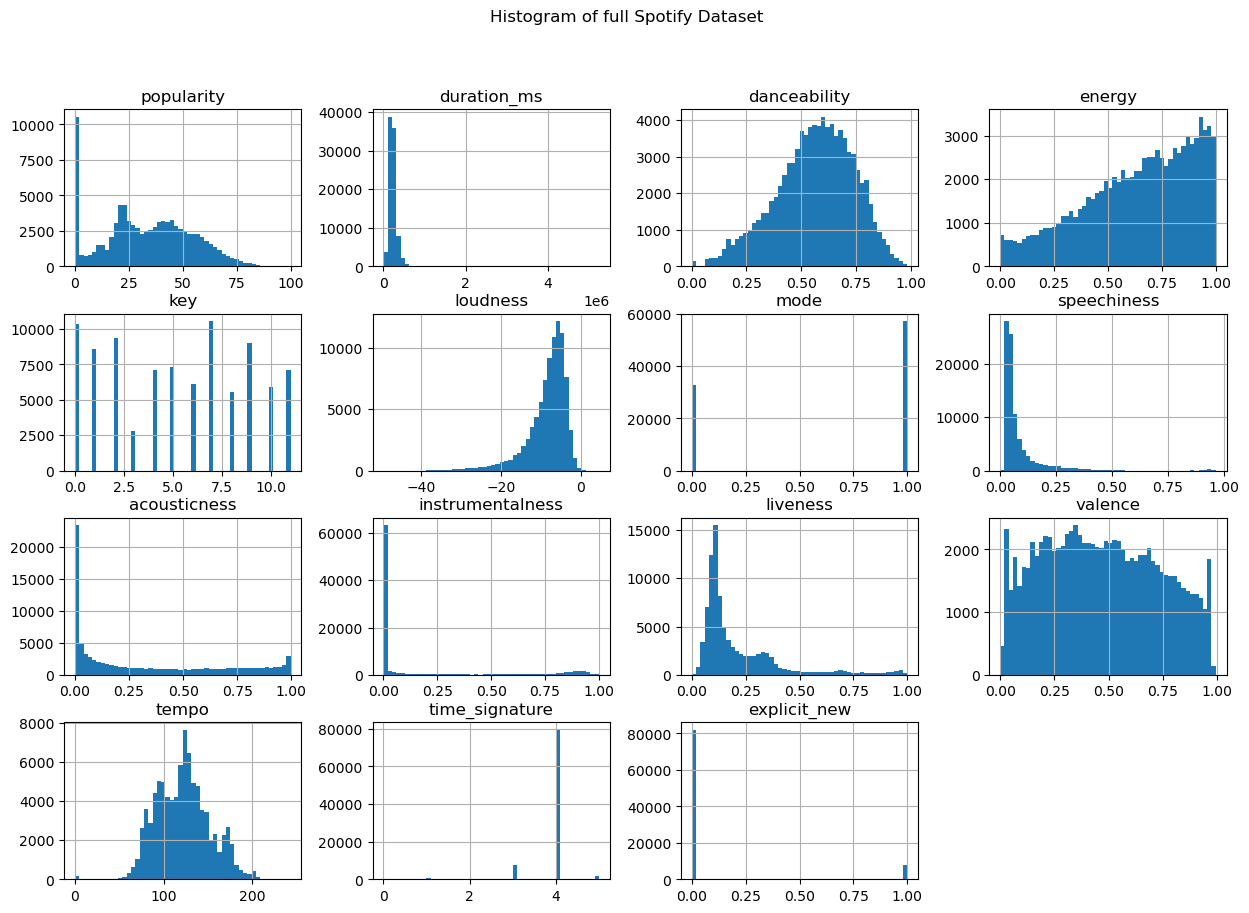

In [23]:
spotify_clean.hist(bins = 50, figsize = (15, 10))
plt.suptitle("Histogram of full Spotify Dataset")
plt.show()

There are a few things we can note from the visualisation. We can see that our dataset we have skewed variables, namely:


1) duration_ms (right skewed)
2) loudness (left skewed)
3) speechiness, (right skewed)
4) accousticness (right skewed, with large observations concentrated near 0)
5) instrulmentalness (right skewed, with a large observations concentrated near 0)
6) liveliness (right skewed)

    
Furthermore, when inspecting the logical vairbales, such as "mode" and "explicit_new", there seems to be an imbalance. It is impotant to note that the imbalance in the "explicity_new" predictor is more pronouced with very few music containing explicit language. The plot also indicates that there are far more tracks with a minor melodic scale than a major melodic scale. Another imbalance that is noticeable is the "time_signiture" of observations, with 4/4 beats being the majority and the remaining minorties. 

Just by observation, there seems a bell curve distribution to "tempo" and "danceability". "Energy" has more non-negligible number of observation close to zero but it is also worth noting that the the number of observation are increasing as the energy value is inreasing.

"Valence" and "key" have a sort or uniformity, even though one is continuous and the other is an integer representing the different picth class in a tracks. 

When inspecting our target variable, "popularity" there is a large concentration of observation around 0, with the remaining of the values on x-axis being a flat bell shaped. 

Now that we have conducted our preliminary inspection using a histogram, it is best to split the data set and work only on the training set whether it is for further visualisation or any other multivariate analysis that we may conduct. 

#### Split the data 

In order to split the data we need to seperate the features and the target variable. We will use the convention and call the feature variables "X" and the target variable "y". Eventhough we are not conducting any analysis in this notebook, this is considered good practice. 

In [24]:
X = spotify_clean.drop("popularity", axis = 1)
y = spotify_clean["popularity"]

We split examples randomly with 75% being the training set and 25% being the test set. 

In [25]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [26]:
X_train.insert(0, "popularity", y_train)

In [27]:
# Creating a new variable called 'spotify_vis' for visualisation purpose from the training 
spotify_vis = X_train.copy()

In [28]:
# Reverting X_train back to it orginal form of split 
y_train = X_train['popularity']
X_train = X_train.drop("popularity", axis = 1)

We create a new data frame that includes the X_train and y_train for visualisation purpose. and then revert it back the orginal where y_train contains popularity and X_train only has the predictors. 

#### Numerical Visualisation

For the numerical visualisation we will be saving the subset of the numerical predictors. Also create a list of the numerical that will be plotted. In the first stage we will be using a box plot to assess if there are any outliers in the data seta and see how it is distributed. Then we will use multivariate analysis such as correlation and scatter plot to see if we can visually inspect the relationship amongst predictors and the target variable. 

In [29]:
# Subsetting the clean data with all the numerical predictors
spotify_num = spotify_vis.select_dtypes(include=['float64', 'int64'])

# Create a list of the numerical perdictors 
numerical_columns = ["popularity", "duration_ms", "tempo", "loudness", "acousticness", 
                     "danceability", "energy", "instrumentalness", "liveness", 
                     "speechiness", "valence"]

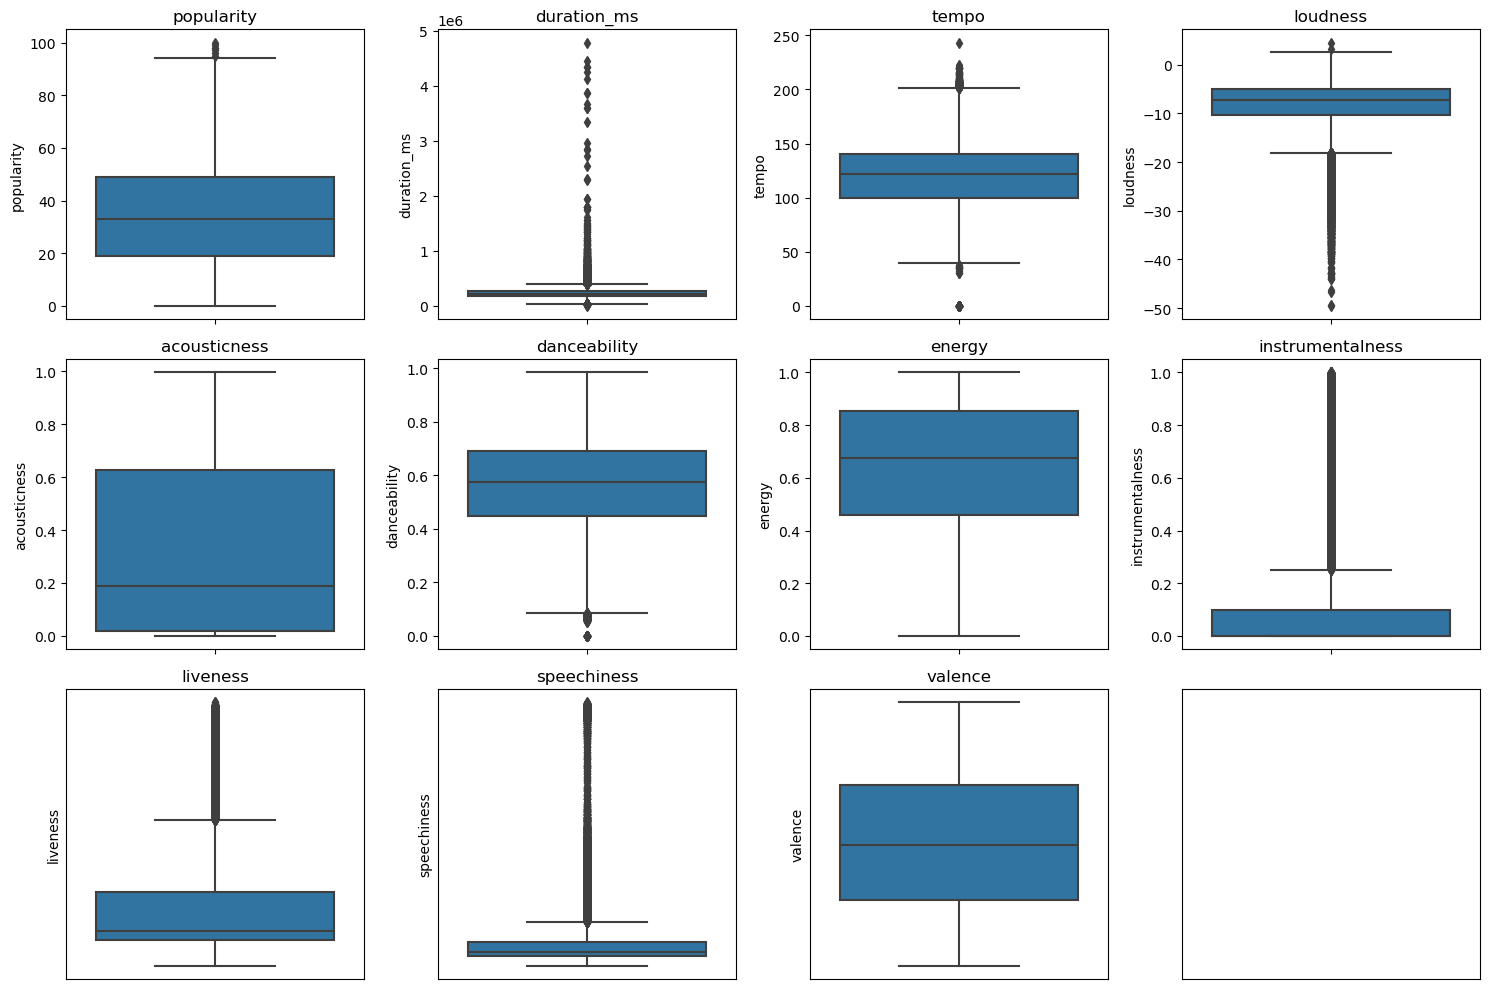

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.set_facecolor('white')

for i, col in enumerate(numerical_columns): 
    sns.boxplot(y = col, data = spotify_num, ax = axes[i//4, i%4])
    axes[i//4,i%4].set_title(col)
    axes[i//4,i%4].set_facecolor("white")
for ax in axes.flat:
    ax.set_facecolor("white")
for ax in axes[-1]:
    ax.tick_params(axis = 'both', which = "both", bottom = False, top = False,
                   left = False, right = False, labelbottom = False, labelleft=False, 
                   labelright=False)
                   
plt.tight_layout()
plt.show()

The box plot indicates that there are many outliers in "duration_ms", "tempo", "loudness", "instrumentalness", "liveness", "speechiness". The target variable has one outlier that is present. We can aslo see that the distribution are skewed and that while a larger spread such as "acousticness", "energy", and "valence". 

Since we are conducting a Ridge Regression the learning algorithm can help with some extent curb the effects of the ourliers. The outliers are an important aspect of the dataset as they can reflect the wide range of tracks that are important in dertermining the popularity


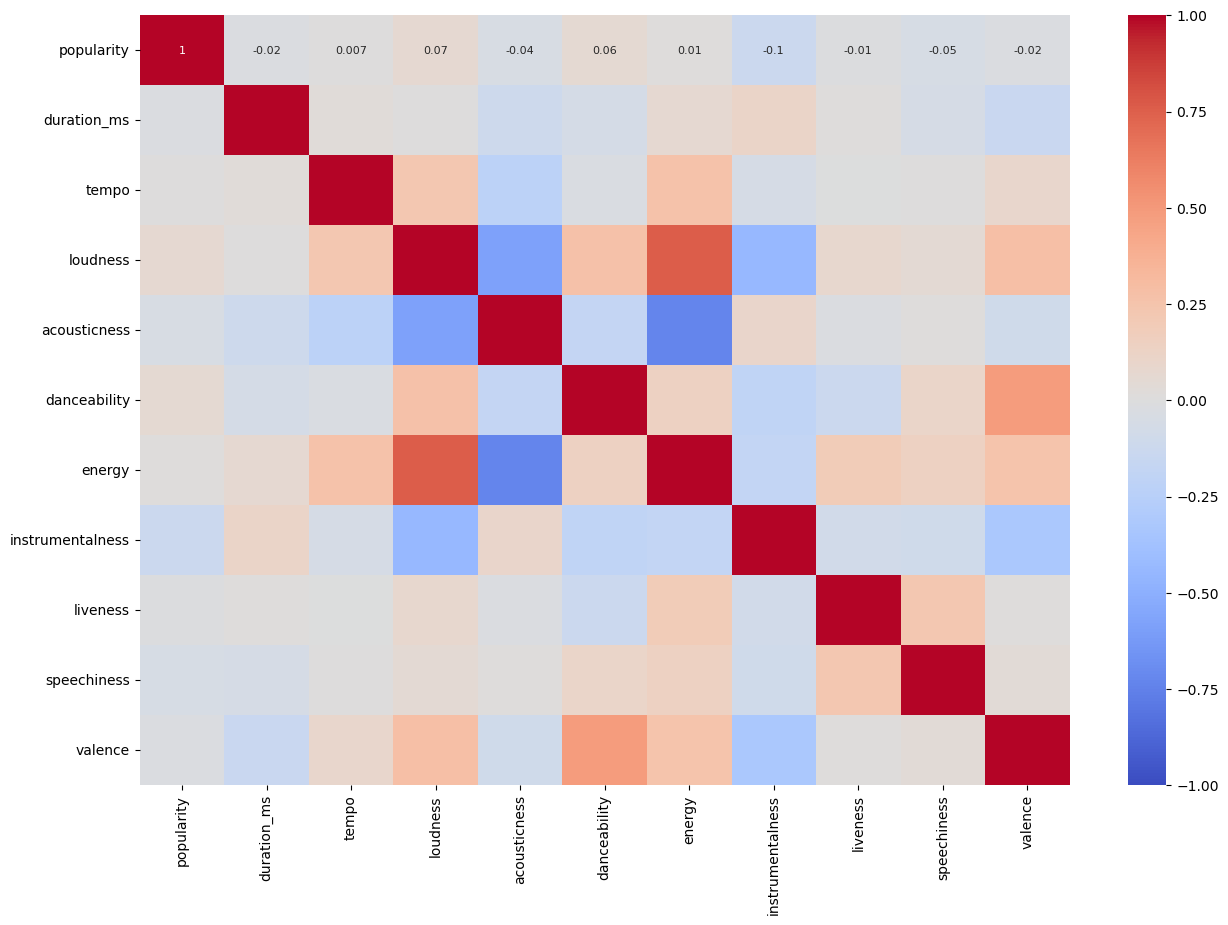

In [31]:
correlation_matrix = spotify_num[numerical_columns].corr(method = "pearson")

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation_matrix, center=0, annot= True, fmt=".1g", ax=ax,
            cmap="coolwarm", vmin=-1, vmax=1, annot_kws={"size": 8})
plt.show()

Results from the correlation plot indicate that there is is a strong postive correlation between "loudness" and "energy" ans a somewhat weak postive correlation between "danceability" and "valence". On the other hand we notics a strong negative correlation between "acousticness" and "energy", a somewhat negative significant correlation between "loudness" and "acousticness" and a weaker negative correlation between "loudness" and "instrumaentalness". 

In order to see if we can extract any information from the scatter plot it would be best to take a sample of the training set. Because it is difficult to extract any insight from the data set if there are too many data points we will be sampling 4% of the entire training set with the numerical predictors and target variable.

In [32]:
spotify_num_sample = spotify_num.sample(int(0.004 * len(spotify_num)))
spotify_num_sample.shape

(269, 15)

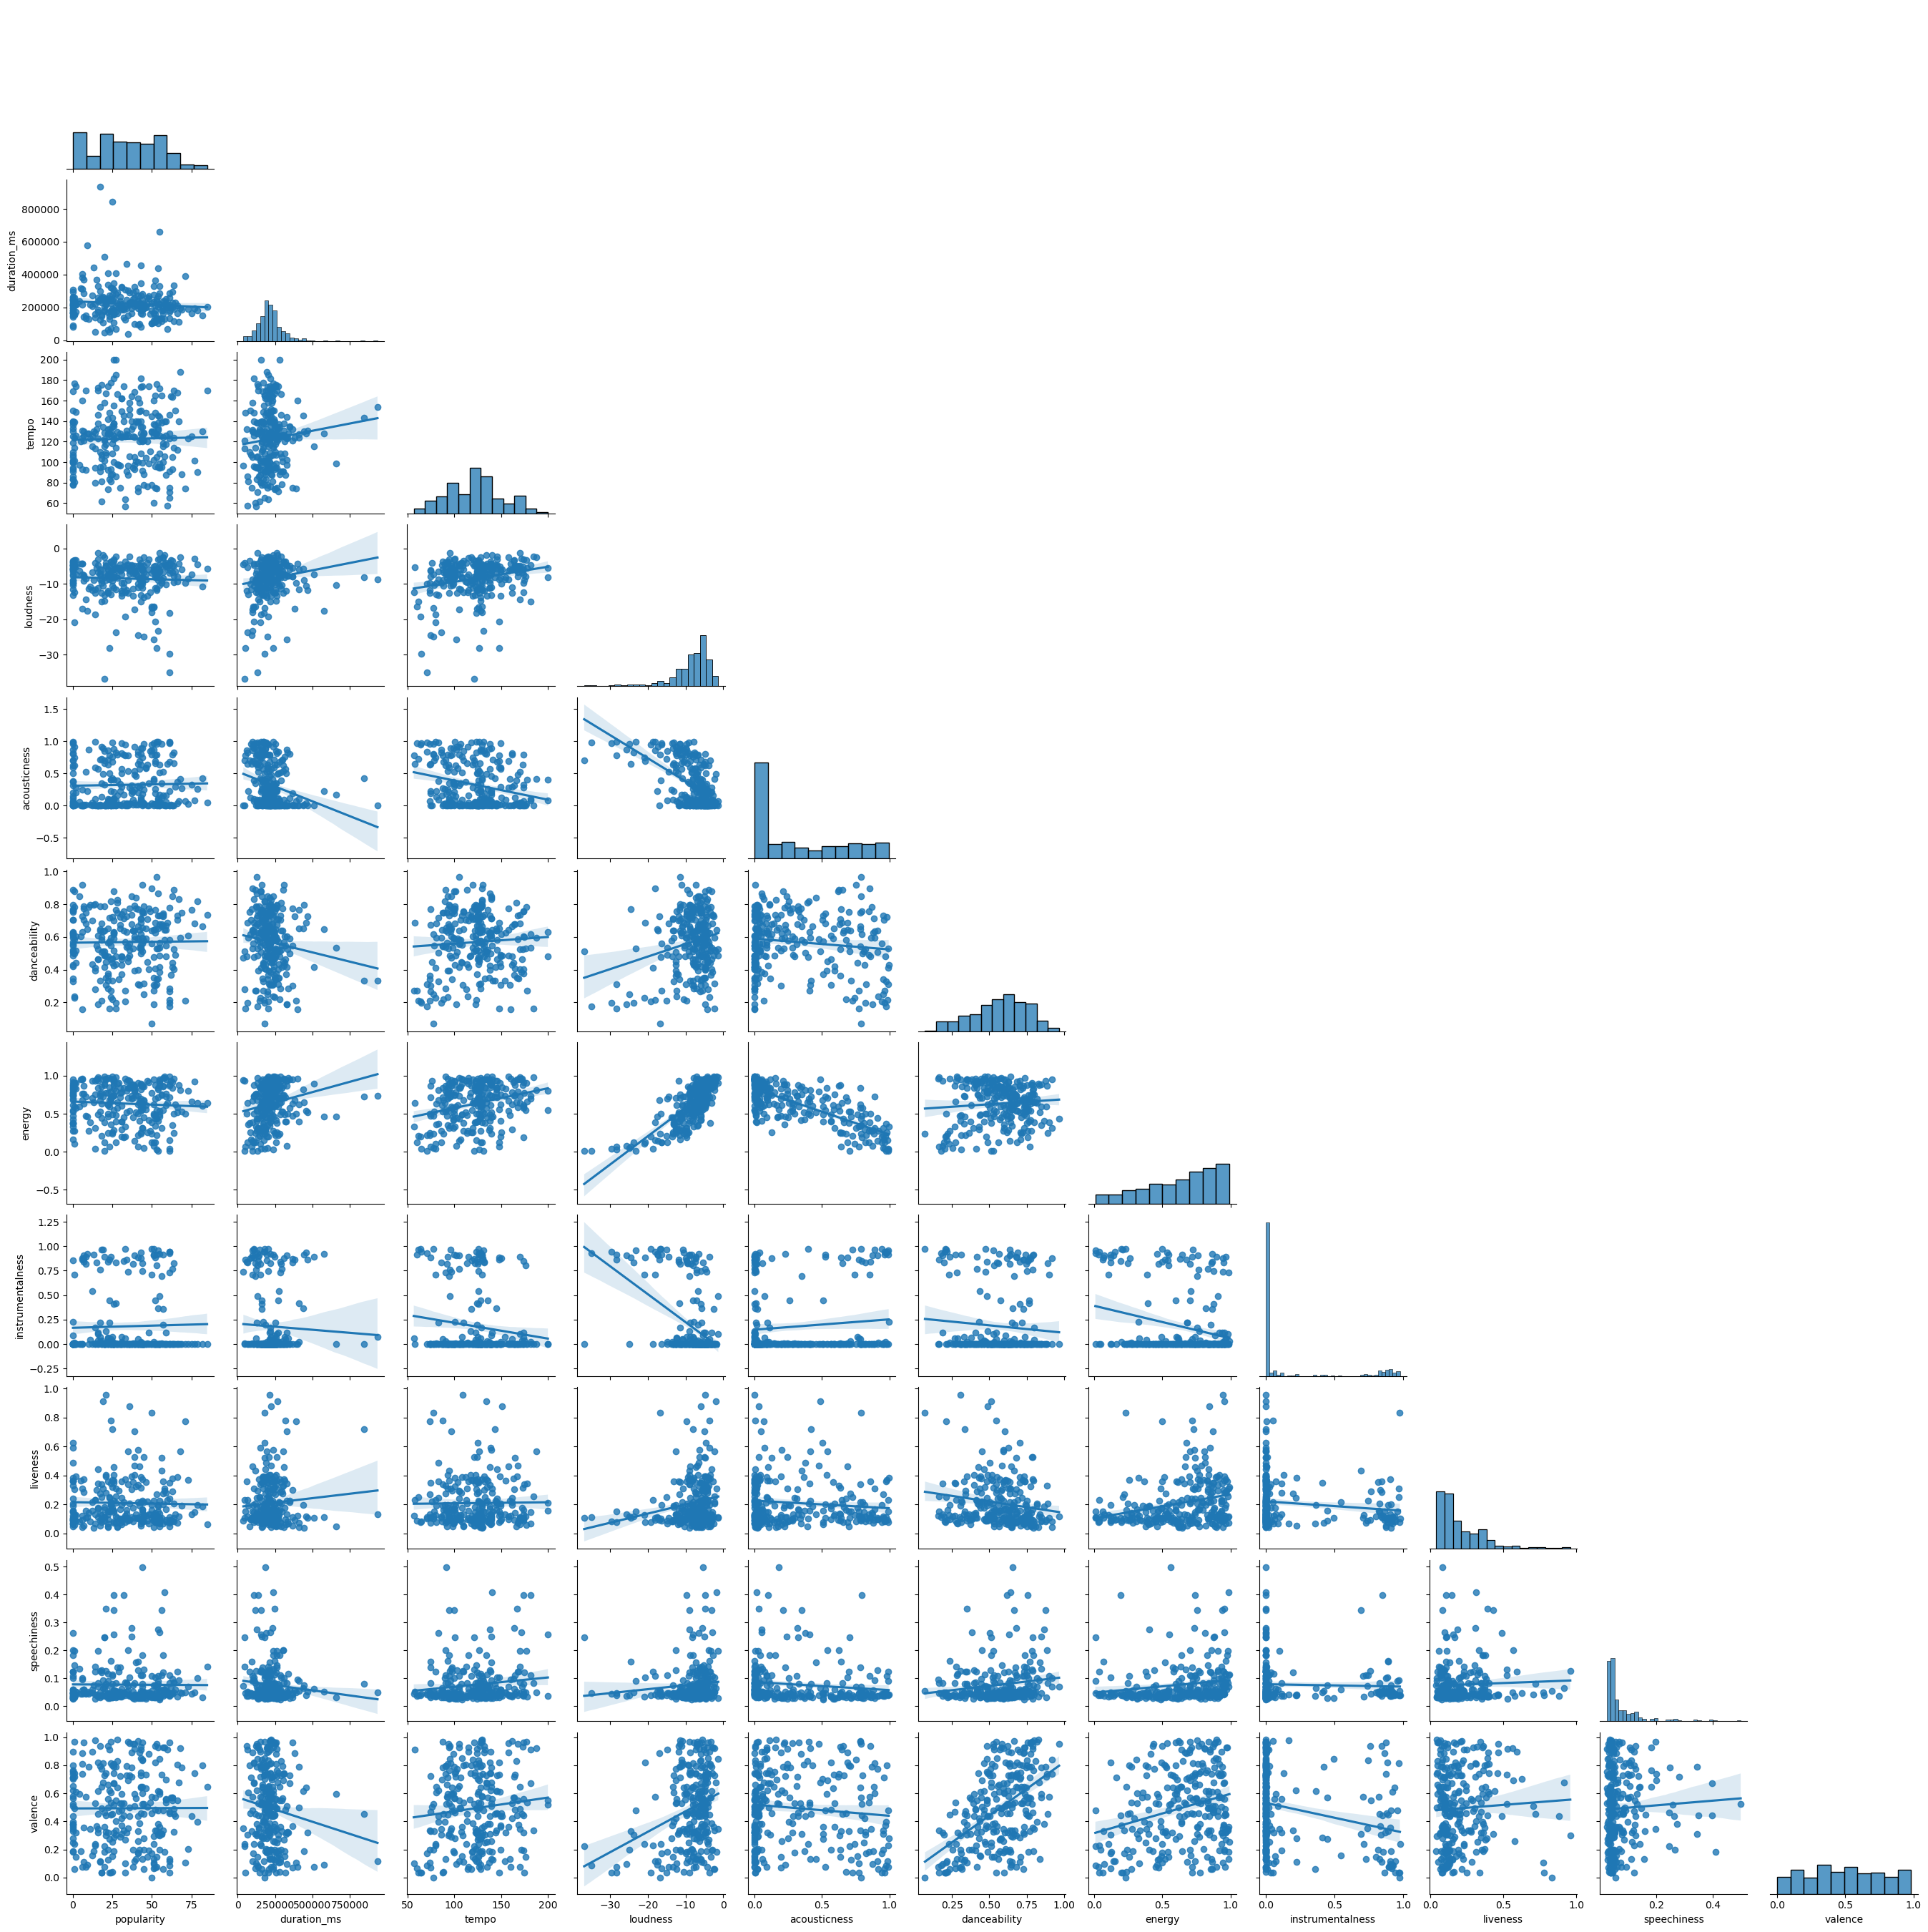

In [33]:
sns.pairplot(spotify_num_sample[numerical_columns], kind = "reg", corner = True)

Now that we have a better visualisation and we can see the linear relationship of the features. Evaluating the target variable against the predictors, the linear relationship is weak accross the board. Where as there are noticeable relationships amongst the predictors. Since we will predominantly be using Ridge Regression these multicollinearity issues are not something that worry us very much. 

In summary, after analysing the state of our numerica predictors, we saw that some predictors exhibited skeweness. We will handle these skewed values by transforming them ans see what impacts that may result in the their shapes and the relationship they have with other variables. Also we will be tranforming the "duration_ms" as it is stored in millisecond converting it into seconds, this will reduce the large values that we see within the variable. 

##### Tranformed Data Set 

In [34]:
spotify_log_transformed = spotify_num.copy()

In [35]:
def convert_ms_to_s(data, column_name): 
    
    stripped_column_name = column_name.split("_")[0]
    
    data[stripped_column_name + "_s"] = data[column_name] / 1000

In [36]:
convert_ms_to_s(spotify_log_transformed, "duration_ms")

In [37]:
predictors_tranformed = [ "duration_s", "duration_ms", "speechiness", "acousticness", 
              "instrumentalness", "liveness"]

In [38]:
for predictor in predictors_tranformed:
    spotify_log_transformed['log_' + predictor] = np.log1p(spotify_log_transformed[predictor])

We have conducted a transformation process for "duration_ms" from milliseconds to seconds. The we stored a list of all the predictors that exhibited right-skewness and tranformed them using log(x + 1) traformation since some of the predictors range between 0 and 1, having 0 in the dataset.  

In [39]:
numerical_transformed_columns = ["log_duration_s",  "duration_s", "log_acousticness", "acousticness", 
                     "log_instrumentalness",  "instrumentalness", 
                     "log_speechiness", "speechiness", "liveness", "log_liveness"]

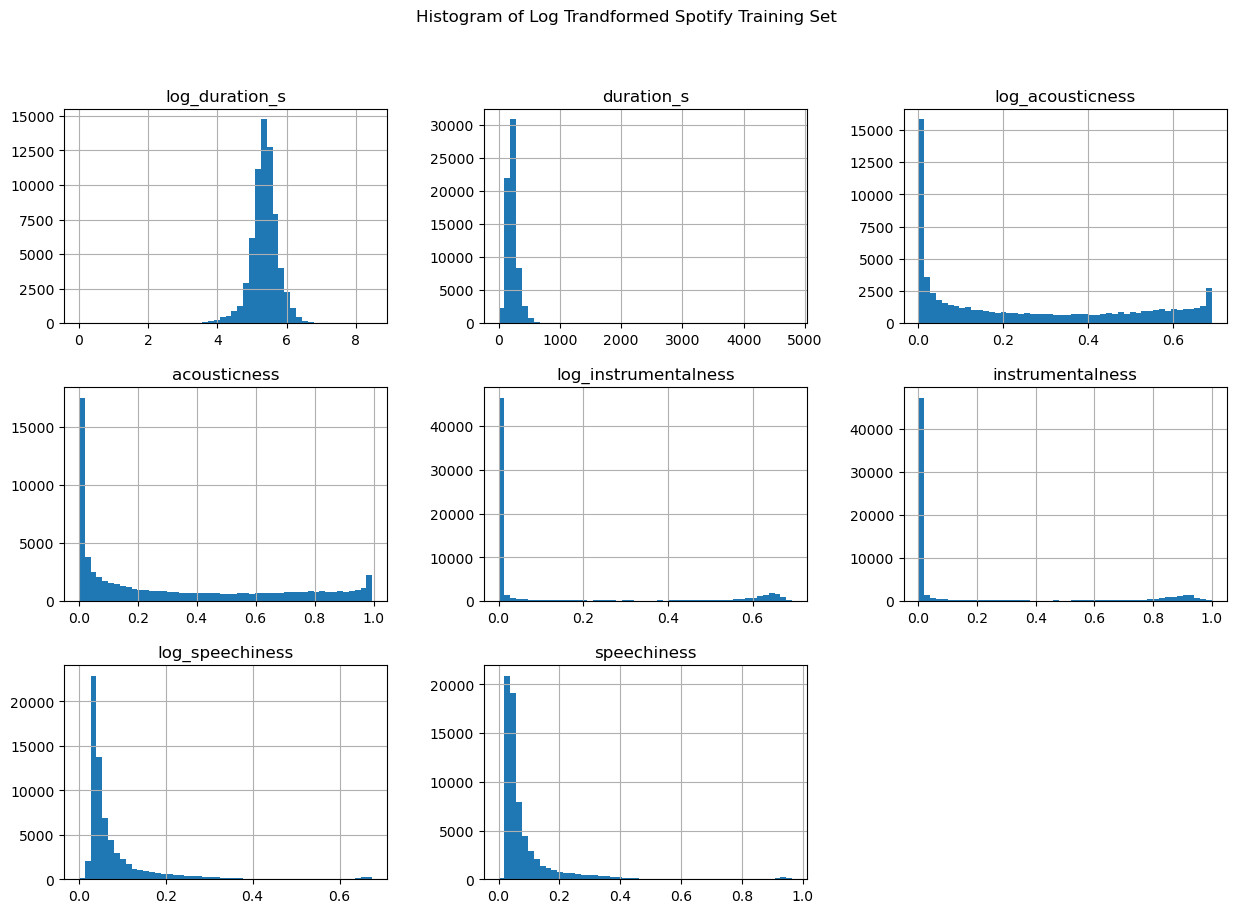

In [40]:
spotify_log_transformed[numerical_transformed_columns].hist(bins = 50, figsize = (15, 10))
plt.suptitle("Histogram of Log Trandformed Spotify Training Set")
plt.show()

We can see that the log tranformation has worked for few predictors where as there is little to none noticebale change on a majority of the predictors. The predictor "duration_ms" had been converted from miliseconds to seconds with "duration_s" as it appears in the first row second column of the plot. Then we tranformed it using log(x + 1) which gives us a normal distribution. The other very small change that is observed is in "log_speechiness" where we can see that some observations that were close to zero had been shifted in under the log tranformation and included in the subsequent bin range. This similarly observed in "log_acousticness" but is not visisble at first glimpse until the y-axis is evaluated. Thus we will keep these values and conduct a correlation and scatter plot to see how they interact with each other. 

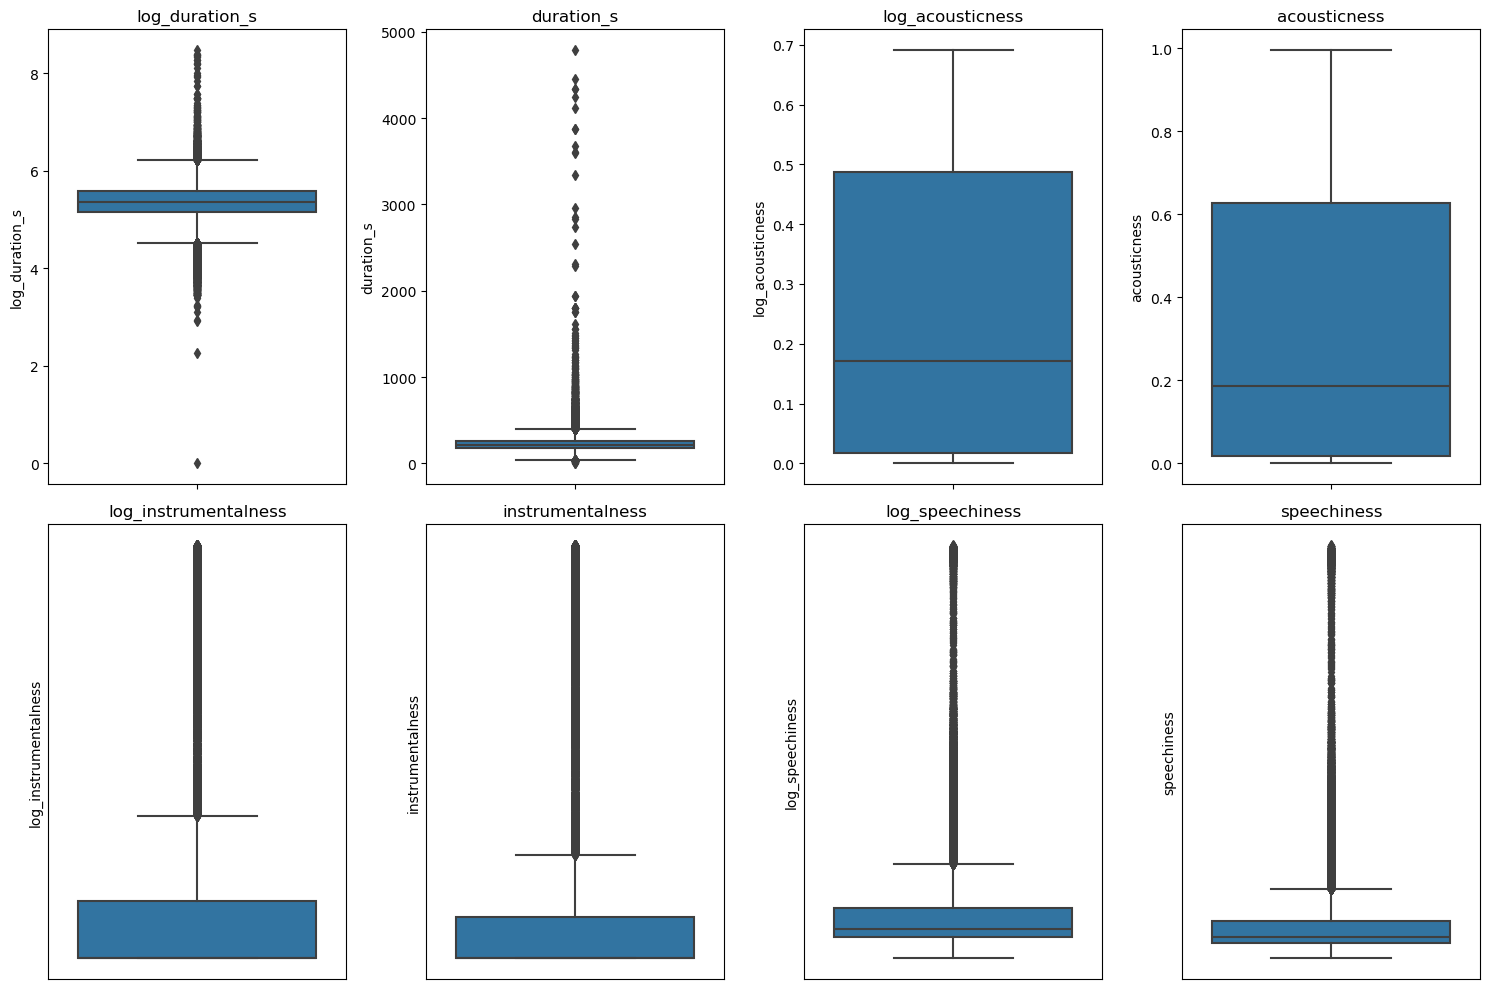

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
fig.set_facecolor('white')

for i, col in enumerate(numerical_transformed_columns): 
    sns.boxplot(y = col, data = spotify_log_transformed, ax = axes[i//4, i%4])
    axes[i//4,i%4].set_title(col)
    axes[i//4,i%4].set_facecolor("white")
for ax in axes.flat:
    ax.set_facecolor("white")
for ax in axes[-1]:
    ax.tick_params(axis = 'both', which = "both", bottom = False, top = False,
                   left = False, right = False, labelbottom = False, labelleft=False, 
                   labelright=False)
                   
plt.tight_layout()
plt.show()

The box plot for "duration_ms" has changed with outliers at the end of both whiskers and reducing its skewness. Also, we cna obser that the box and the whisker "log_instrumesntalness" has a slight increase in variability compared to its orginal and higher whisker too. In addition we, can see the median and the top whisker of "log_speechiness" has increased when compared to the original predictor. 

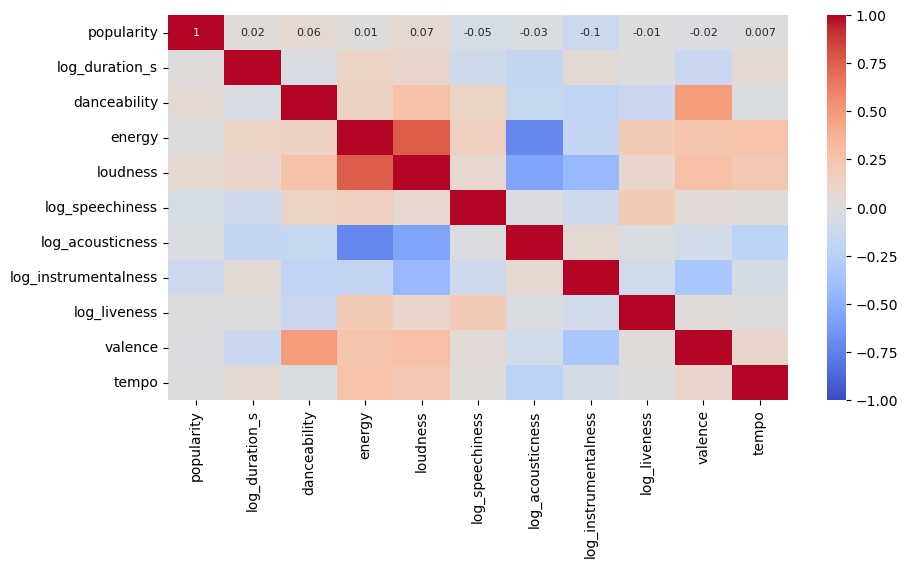

In [42]:
numerical_scatter_columns = ["popularity", "log_duration_s",  "danceability", "energy",  
                     "loudness",  "log_speechiness", "log_acousticness", "log_instrumentalness", 
                     "log_liveness", "valence", "tempo"]

correlation_matrix_transformed = spotify_log_transformed[numerical_scatter_columns].corr(method = "pearson")

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(correlation_matrix_transformed, center=0, annot= True, fmt=".1g", ax=ax,
            cmap="coolwarm", vmin=-1, vmax=1, annot_kws={"size": 8})
plt.show()

In [43]:
spotify_log_tranformed_sample = spotify_log_transformed.sample(int(0.004 * len(spotify_log_transformed)))
spotify_log_tranformed_sample.shape

(269, 22)

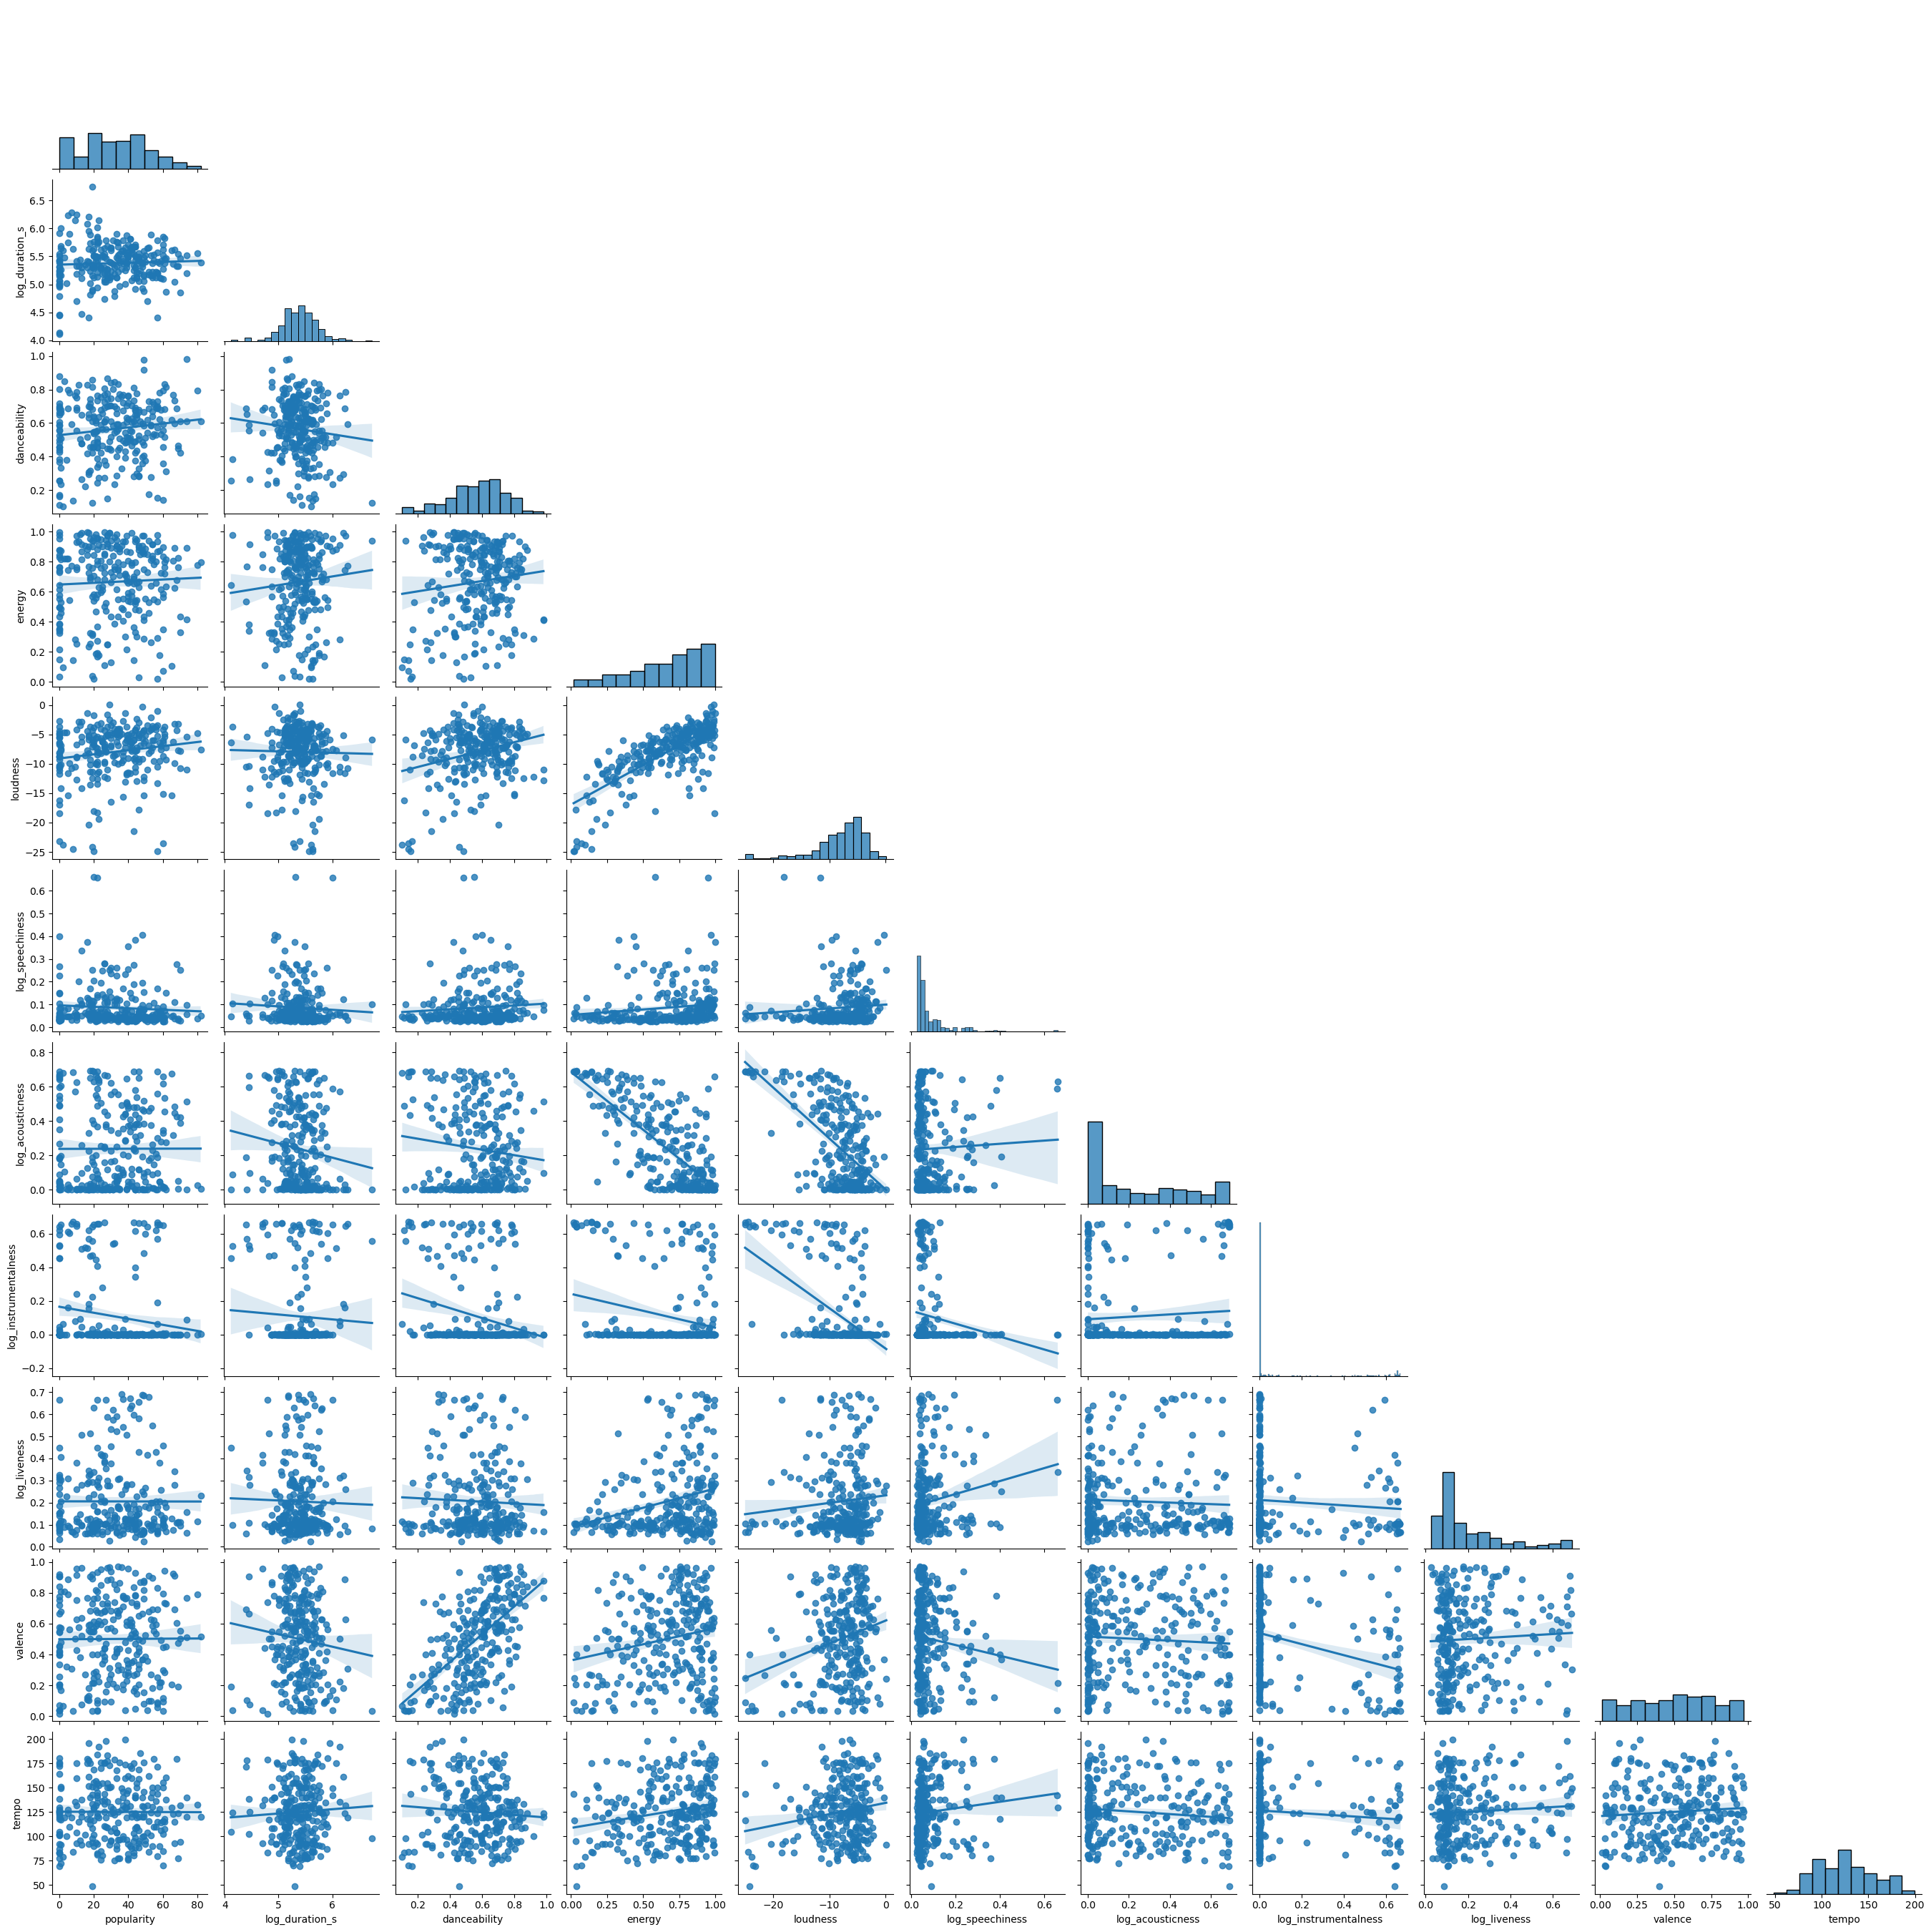

In [44]:
sns.pairplot(spotify_log_tranformed_sample[numerical_scatter_columns], kind = "reg", corner = True)

#### Non-Numerical Variable 

In the data set we have five predictors that are stored as type object. We will inspect these objects to find out which of them are pertinent to our analysis. We will see the unique values they store and the manner in which they are stored. This will enable us to decide how to treat them whether they should be included in the analysis and how they should be included when performing the analysis. 

In [45]:
spotify_cat = spotify_vis.select_dtypes(include=['bool', 'object'])
spotify_cat.insert(0, 'popularity', spotify_vis['popularity'])


In [46]:
spotify_cat.head()

,popularity,track_id,artists,album_name,track_name,explicit,track_genre
81967,50,7MiYNyj5si5yiWyeSkgzqB,Joachim Pastor;Worakls,"Hungry Music Remix, Vol. 1",Joda - Worakls Remix,False,"techno,minimal-techno"
43330,37,77Jbr7aQyYsH20luHDn7iv,Reznik,Strangulační Rýha,Nemluv Na Mě,True,emo
76433,4,7L3KutrPE340fQmYyPJoAP,Morat;Juanes,Hora del taco sin auto,Besos En Guerra,False,latin
20875,69,6rUtMKEej81ORTGtCpjyOJ,Tom Odell,Best Day Of My Life,Best Day Of My Life,True,chill
35773,20,2hwGeNlK1KfAQ6BCIpp89m,Aries;Rahmanee;Gardna,Jungle Style,On Road,False,drum-and-bass


Inspecting the subsequent five rows we get "track_id", "artists", "album_name", "track_name" and "explicit" which we have already inspected in the numerical section by tranforming into 0s and 1s. Nonetheless we will still inspect it against the againsts the target variable.

In [47]:
print("Artists Unique Values Count:", len(spotify_cat["artists"].unique()))
print("Album Name Unique Values Count:", len(spotify_cat["album_name"].unique()))
print("Track Name Unique Values Count:", len(spotify_cat["track_name"].unique()))
print("Genre Unique Values Count:", len(spotify_cat['track_genre'].str.split(',').explode().unique()))


Artists Unique Values Count: 26092
Album Name Unique Values Count: 37843
Track Name Unique Values Count: 56891
Genre Unique Values Count: 114


There are many unique values within the perdictors this includes "artists", "album_name" "track_name" but significantly smaller in the "track_genre". In the data set documentation it is stated that tracks with multiple artsists are seperated by ';' let us see how the predictor is stored in order to think of a best course of action for future treatment. 

In [48]:
artists_counts = Counter(spotify_cat['artists'])
artists_items = list(artists_counts.items())
print(artists_items[:2])

[('Joachim Pastor;Worakls', 1), ('Reznik', 7)]


In the first istance we can see that there are indeed values within the object "artists" that are composed of two artists seperated by a ';'.

In [49]:
kendrick_entries = {artist: count for artist, count in artists_counts.items() if isinstance(artist, str) and 'Kendrick Lamar' in artist.split(';')}
print(kendrick_entries)

{'Mac Miller;Kendrick Lamar': 1, 'Kendrick Lamar;Blxst;Amanda Reifer': 1, 'Skrillex;Kendrick Lamar': 1, 'Kendrick Lamar;SZA': 1, 'Kendrick Lamar': 1, 'Flying Lotus;Kendrick Lamar': 1, 'The Lonely Island;Adam Levine;Kendrick Lamar': 1}


For instance, Kendrick Lamar appears in several featuring tracks with different artists which will result as the unique count higher as it doens't consider him alone but the combination of other artists. In order to actually determin the actual unique values in the artists let inspect further. 

In [50]:
artists = spotify_cat["artists"].str.split(';').explode().unique()
print(f"There are {len(artists)} unique artists in the dataset.")

There are 25816 unique artists in the dataset.


We can see that this is a much lower number than the actual values that counts differnet combinations of artists that may perform with different artists being counted as a unique value. Since this may help us reduce the dimensionality of the data for analysis we will consider using this methods to inlude in the analysis.  

Now that we have this let us plot the top 10 artists that have the most popular tracks at the time the data set has been collected. Also we will include a freqency plot of the artists and the genres. 

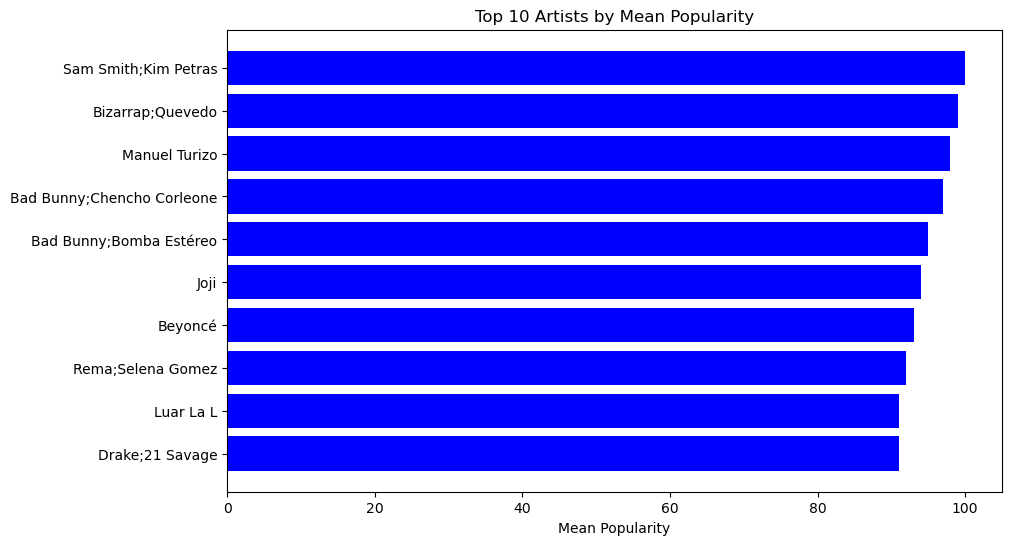

artists
Sam Smith;Kim Petras          1
Bizarrap;Quevedo              1
Manuel Turizo                 1
Bad Bunny;Chencho Corleone    1
Bad Bunny;Bomba Estéreo       1
Joji                          1
Beyoncé                       1
Rema;Selena Gomez             1
Luar La L                     1
Drake;21 Savage               1
Name: count, dtype: int64


In [51]:
# Group by 'artists' and calculate the mean popularity and count for each artist
artist_popularity = spotify_cat.groupby('artists')['popularity'].agg(['mean', 'count'])

# Sort by mean popularity and take the top 10
top_artists = artist_popularity.sort_values(by='mean', ascending=False).head(10)

# Create a bar plot for the mean popularity
plt.figure(figsize=(10, 6))
plt.barh(top_artists.index, top_artists['mean'], color='blue')
plt.xlabel('Mean Popularity')
plt.title('Top 10 Artists by Mean Popularity')
plt.gca().invert_yaxis()  # invert the y-axis to show the artist with the highest mean popularity on top
plt.show()

# Print the count for each of the top artists
print(top_artists['count'])


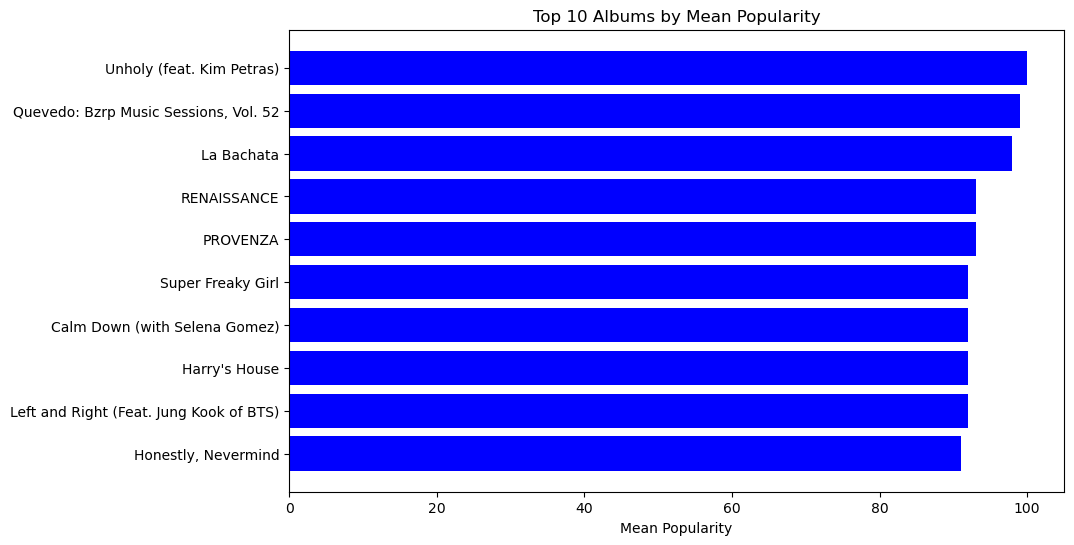

album_name
Unholy (feat. Kim Petras)                  1
Quevedo: Bzrp Music Sessions, Vol. 52      1
La Bachata                                 1
RENAISSANCE                                1
PROVENZA                                   1
Super Freaky Girl                          1
Calm Down (with Selena Gomez)              1
Harry's House                              1
Left and Right (Feat. Jung Kook of BTS)    1
Honestly, Nevermind                        1
Name: count, dtype: int64


In [52]:
# Group by 'album_name' and calculate the mean popularity and count for each track
track_popularity = spotify_cat.groupby('album_name')['popularity'].agg(['mean', 'count'])

# Sort by mean popularity and take the top 10
top_tracks = track_popularity.sort_values(by='mean', ascending=False).head(10)

# Create a bar plot for the mean popularity
plt.figure(figsize=(10, 6))
plt.barh(top_tracks.index, top_tracks['mean'], color='blue')
plt.xlabel('Mean Popularity')
plt.title('Top 10 Albums by Mean Popularity')
plt.gca().invert_yaxis()  # invert the y-axis to show the track with the highest mean popularity on top
plt.show()

# Print the count for each of the top tracks
print(top_tracks['count'])

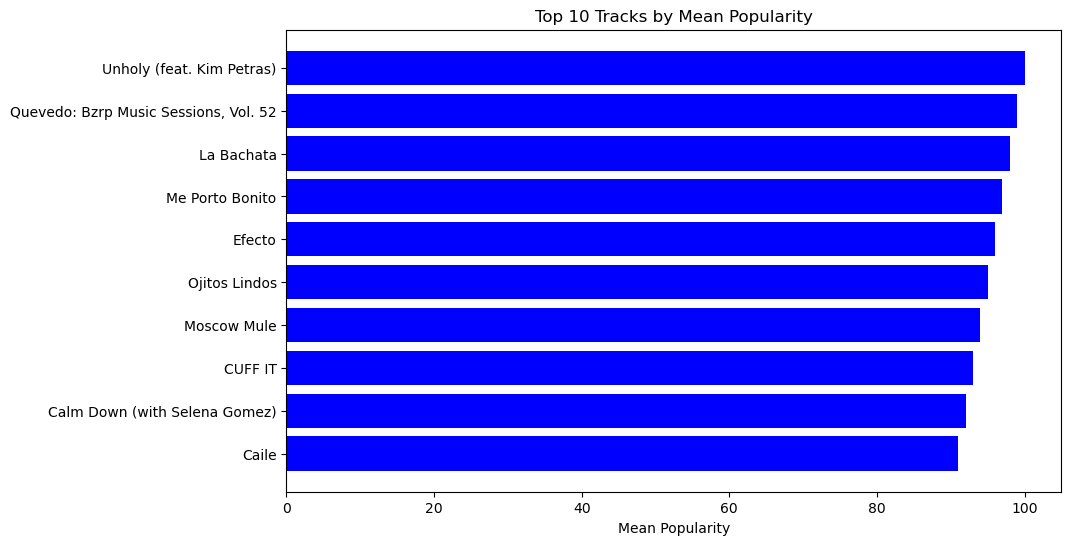

track_name
Unholy (feat. Kim Petras)                1
Quevedo: Bzrp Music Sessions, Vol. 52    1
La Bachata                               1
Me Porto Bonito                          1
Efecto                                   1
Ojitos Lindos                            1
Moscow Mule                              1
CUFF IT                                  1
Calm Down (with Selena Gomez)            1
Caile                                    1
Name: count, dtype: int64


In [53]:
# Group by 'track_name' and calculate the mean popularity and count for each track
track_popularity = spotify_cat.groupby('track_name')['popularity'].agg(['mean', 'count'])

# Sort by mean popularity and take the top 10
top_tracks = track_popularity.sort_values(by='mean', ascending=False).head(10)

# Create a bar plot for the mean popularity
plt.figure(figsize=(10, 6))
plt.barh(top_tracks.index, top_tracks['mean'], color='blue')
plt.xlabel('Mean Popularity')
plt.title('Top 10 Tracks by Mean Popularity')
plt.gca().invert_yaxis()  # invert the y-axis to show the track with the highest mean popularity on top
plt.show()

# Print the count for each of the top tracks
print(top_tracks['count'])

We find consistent output as expected, the "artists" with correspond with the popular "track_name" and "album_name". What might be interesting to see is the "track_genre" and the popularity in the data set. 

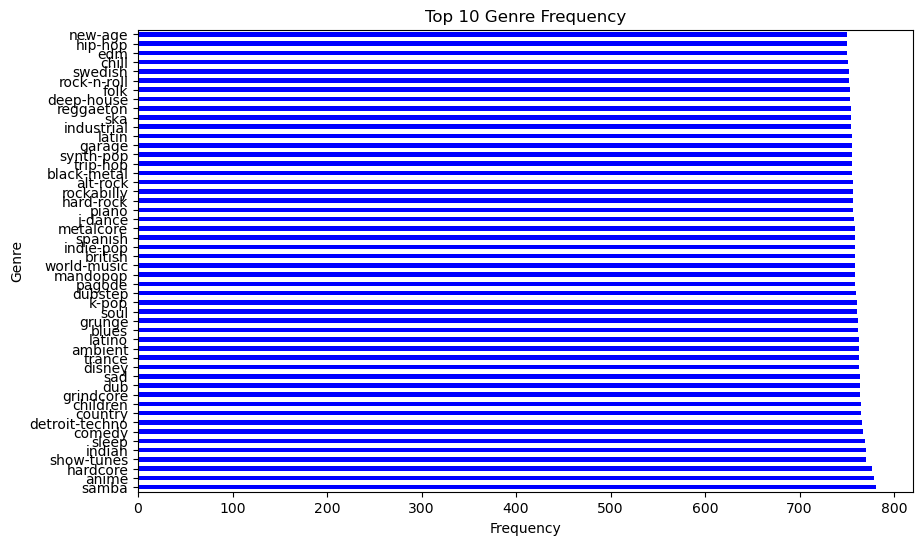

In [54]:
# Extracting the 'track_genre' column
genres = spotify_cat['track_genre'].str.split(',', expand=True).stack()

# Count the frequency of each genre
genre_counts = genres.value_counts()

# Selecting the top 10 genres
top_10_genres = genre_counts.head(50)

# Plotting the top 10 genres with genres on the y-axis
top_10_genres.plot(kind='barh', figsize=(10, 6), color='blue')
plt.title('Top 10 Genre Frequency')
plt.ylabel('Genre')  # Switching ylabel and xlabel for a horizontal plot
plt.xlabel('Frequency')
plt.show()

We can see that different genres are balanced within the data set. So we will explore how the popularity of the comma sepearted format after we had grouped and before we had grouped perform with respect to popularity. 

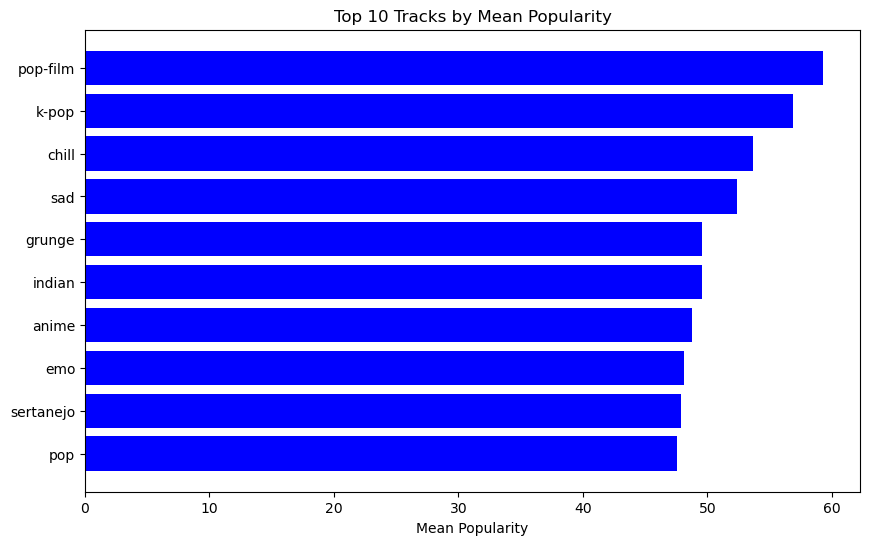

track_genre
pop-film     1000
k-pop        1000
chill        1000
sad          1000
grunge       1000
indian       1000
anime        1000
emo          1000
sertanejo    1000
pop          1000
Name: count, dtype: int64


In [55]:
# Group by 'genre_name' and calculate the mean popularity and count for each track
genre_popularity = spotify.groupby('track_genre')['popularity'].agg(['mean', 'count'])

# Sort by mean popularity and take the top 10
top_tracks = genre_popularity.sort_values(by='mean', ascending=False).head(10)

# Create a bar plot for the mean popularity
plt.figure(figsize=(10, 6))
plt.barh(top_tracks.index, top_tracks['mean'], color='blue')
plt.xlabel('Mean Popularity')
plt.title('Top 10 Tracks by Mean Popularity')
plt.gca().invert_yaxis()  # invert the y-axis to show the track with the highest mean popularity on top
plt.show()

# Print the count for each of the top tracks
print(top_tracks['count'])

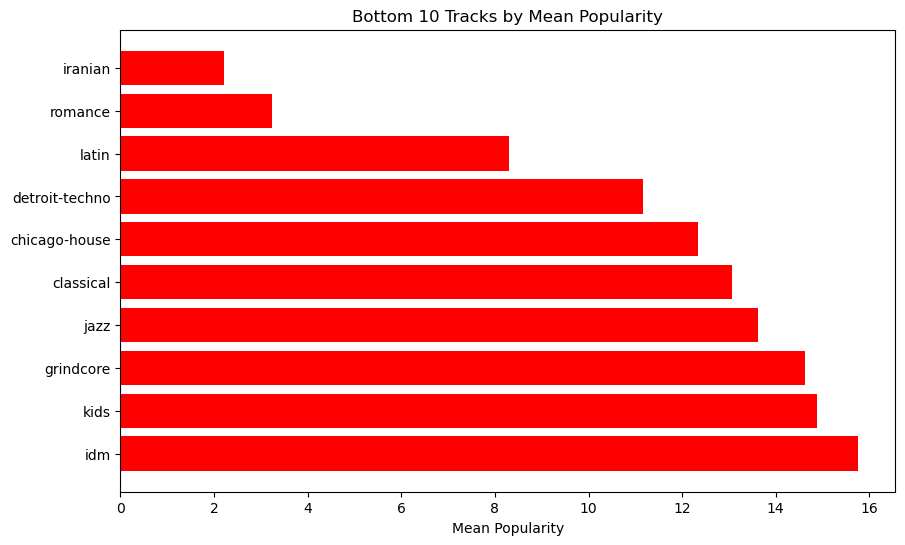

track_genre
iranian           1000
romance           1000
latin             1000
detroit-techno    1000
chicago-house     1000
classical         1000
jazz              1000
grindcore         1000
kids              1000
idm               1000
Name: count, dtype: int64


In [56]:
# Group by 'genre_name' and calculate the mean popularity and count for each track
genre_popularity = spotify.groupby('track_genre')['popularity'].agg(['mean', 'count'])

# Sort by mean popularity and take the top 10
top_tracks = genre_popularity.sort_values(by='mean', ascending=True).head(10)

# Create a bar plot for the mean popularity
plt.figure(figsize=(10, 6))
plt.barh(top_tracks.index, top_tracks['mean'], color='red')
plt.xlabel('Mean Popularity')
plt.title('Bottom 10 Tracks by Mean Popularity')
plt.gca().invert_yaxis()  # invert the y-axis to show the track with the highest mean popularity on top
plt.show()

# Print the count for each of the top tracks
print(top_tracks['count'])

We can see that the different genres without considering the different categories genres they fall into have different popularity. This is somewhat indicative that 'track_genre' influences the popularity of a track. Now let us inspect the different genres that fall different genres and how they perform with respect to popularity. 

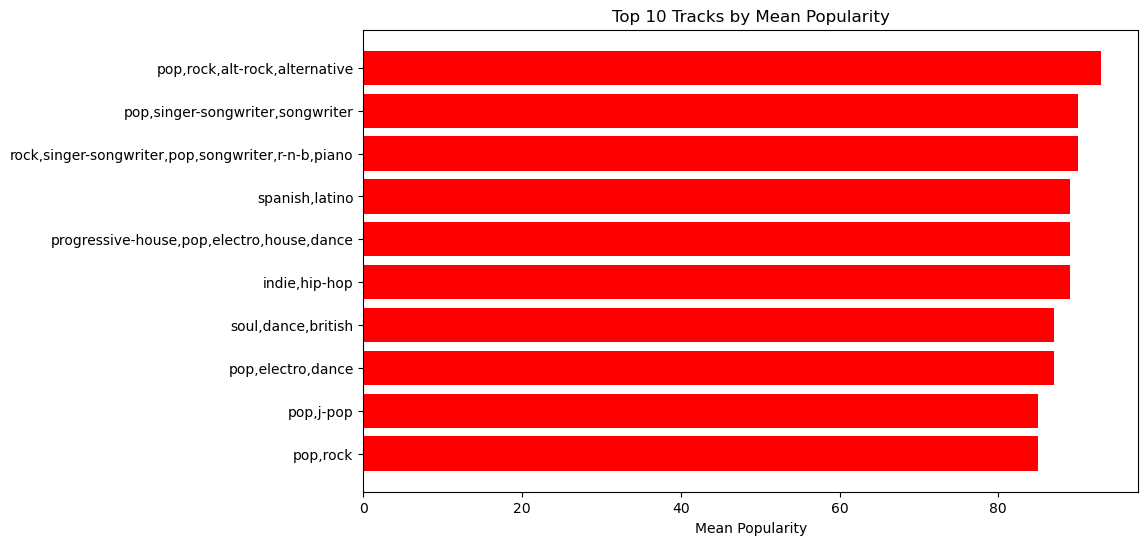

track_genre
pop,rock,alt-rock,alternative                        1
pop,singer-songwriter,songwriter                     1
rock,singer-songwriter,pop,songwriter,r-n-b,piano    1
spanish,latino                                       1
progressive-house,pop,electro,house,dance            1
indie,hip-hop                                        1
soul,dance,british                                   1
pop,electro,dance                                    1
pop,j-pop                                            1
pop,rock                                             1
Name: count, dtype: int64


In [57]:
# Group by 'genre_name' and calculate the mean popularity and count for each track
genre_popularity = spotify_cat.groupby('track_genre')['popularity'].agg(['mean', 'count'])

# Sort by mean popularity and take the top 10
top_tracks = genre_popularity.sort_values(by='mean', ascending=False).head(10)

# Create a bar plot for the mean popularity
plt.figure(figsize=(10, 6))
plt.barh(top_tracks.index, top_tracks['mean'], color='red')
plt.xlabel('Mean Popularity')
plt.title('Top 10 Tracks by Mean Popularity')
plt.gca().invert_yaxis()  # invert the y-axis to show the track with the highest mean popularity on top
plt.show()

# Print the count for each of the top tracks
print(top_tracks['count'])

At the time we can see that these are the genres that had a high popularity. They coincide with the most popular tracks genres.

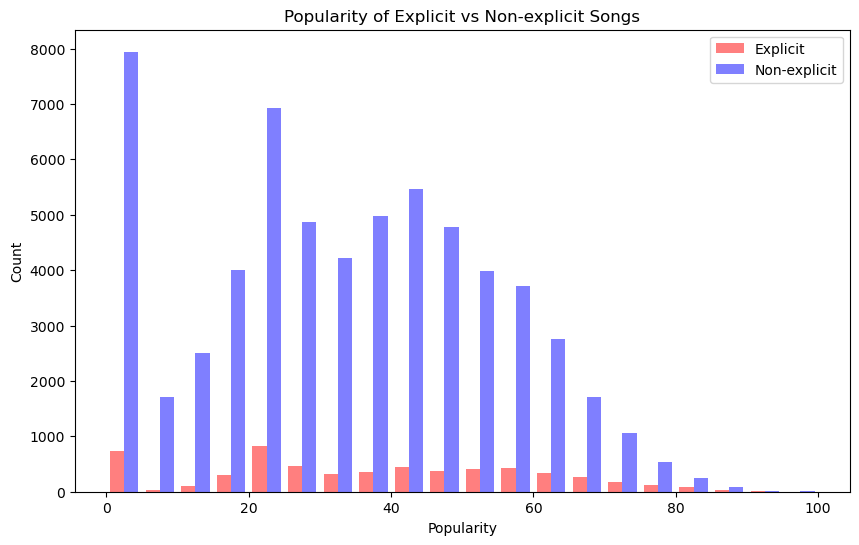

In [58]:
# Separate the data into explicit and non-explicit songs
explicit_songs = spotify_cat[spotify_cat['explicit'] == True]['popularity']
non_explicit_songs = spotify_cat[spotify_cat['explicit'] == False]['popularity']

# Create a histogram for the popularity
plt.figure(figsize=(10, 6))
plt.hist([explicit_songs, non_explicit_songs], bins=20, alpha=0.5,
         label=['Explicit', 'Non-explicit'], color=['red', 'blue'])
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Popularity of Explicit vs Non-explicit Songs')
plt.legend(loc='upper right')
plt.show()

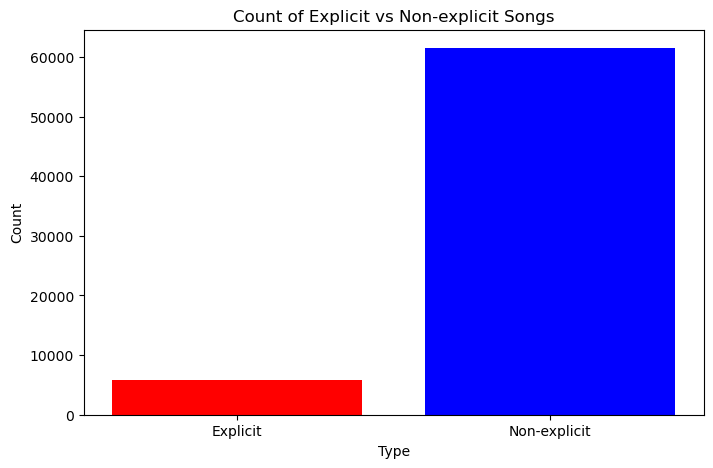

In [59]:
# Count the frequency of explicit and non-explicit songs
explicit_counts = spotify_cat[spotify_cat['explicit'] == True].shape[0]
non_explicit_counts = spotify_cat[spotify_cat['explicit'] == False].shape[0]

# Create a bar plot for the frequency
plt.figure(figsize=(8, 5))
plt.bar(['Explicit', 'Non-explicit'], [explicit_counts, non_explicit_counts], color=['red', 'blue'])
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Explicit vs Non-explicit Songs')
plt.show()

The conclusion we can make about "explcit" is that there are fewer trakcs that are have explicity terms. We can also see that tracks with explicit terms do not garner popularity quick, rather the opposit seem to be true. 

## Summary 

In this section we have seen the predictor and the target variables and the relationship they have with each other. We have seen there are some important pre-processing that must be included before conducting any analysis. It is worth noting in the we will be conducting these pre-processing : 

1) Converting "explicit" from boolean logical to 1s and 0s,
2) Converting "duration_ms" from milliseconds to seconds and storing it as "duration_s",
3) Conducting a $\log(X + 1)$ transormation on variables such as "duration_s", "speechiness", "accousticness", "intrumentalness", and "liveness",
4) Standardization of variables, 
5) Extracting the artists names by splitting on ";" and using hot one encoding,
6) Extracting the track genre by splitting on ',' and using hot one econding  
7) Conducting hot one encoding on any categorical variables that are included
8) Experimenting with different encoding for the categorical to compare performance. 